<a href="https://colab.research.google.com/github/prathamshrivastava/DL-Object_Recognition_ResNet50/blob/main/ObjectRecognitionUsingResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 707M/715M [00:04<00:00, 41.7MB/s]
100% 715M/715M [00:04<00:00, 185MB/s] 


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The data is extracted")

The data is extracted


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 22.7 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile("/content/train.7z", mode = "r")
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing Dependencies

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir("/content/train")
print(len(filenames))
type(filenames)

50000


list

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['21539.png', '37492.png', '29593.png', '3245.png', '49955.png']
['34804.png', '11926.png', '26200.png', '34039.png', '35056.png']


Label Processing

In [ ]:
labels_df = pd.read_csv("/content/trainLabels.csv")
labels_df.shape
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df["id"] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


label Encoding (Doing it manually)

In [ ]:
labels_df["label"].unique()

array(['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
       'cat', 'dog', 'airplane'], dtype=object)

In [ ]:
labels_df["label"].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
#key:value pair
labels_dict = {"airplane":0,"automobile":1,"bird":2,"cat":3,"deer":4,"dog":5,"frog":6,"horse":7,"ship":8,"truck":9}

#initialized a empty list called labels
#for loop takes i as label from dataset labels_df
#labels_dict[i] encode each label one by one by its value and stores in list labels
labels = [labels_dict[i] for i in labels_df["label"]]

In [ ]:
print(labels[0:5])

[6, 9, 9, 4, 1]


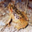

In [ ]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/7796.png")
cv2_imshow(img)

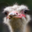

In [ ]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/train/776.png")
cv2_imshow(img)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df["id"])
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [ ]:
#convery images to numpy arrays
train_data_folder = "/content/train/"
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + ".png")
  image = np.array(image)
  data.append(image)

In [ ]:
print(len(data))
print(data[0].shape)

50000
(32, 32, 3)


In [ ]:
#Convert images list and labels list in numpy array, now in form of list
X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [ ]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3)


In [ ]:
#normalize the data list between 0 and 1, right now its between 0 and 255
X_train_scale = X_train/255
X_test_scale = X_test/255

In [ ]:
X_train_scale[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

#setting up the layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(num_of_classes, activation= "softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the neural network
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["acc"])



In [ ]:
#training the neural network
model.fit(X_train_scale,Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.1918 - loss: 2.1589 - val_acc: 0.2750 - val_loss: 1.9520
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.2761 - loss: 1.9566 - val_acc: 0.2800 - val_loss: 1.9567
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.2947 - loss: 1.9072 - val_acc: 0.3067 - val_loss: 1.8758
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.3068 - loss: 1.8922 - val_acc: 0.3185 - val_loss: 1.8595
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3146 - loss: 1.8803 - val_acc: 0.3083 - val_loss: 1.8862
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3128 - loss: 1.8668 - val_acc: 0.3290 - val_loss: 1.8439
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3182 - loss: 1.8599 - val_acc: 0.3187 - val_loss: 1.8605
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3182 - loss: 1.8603 - val_acc: 0.3067 - val_loss: 1.8646
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [ ]:
#transfer learning - taking a pre trained model and training it with our data (ResNet50, Inception)


ResNet50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights="imagenet",include_top=False,input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 452s 356ms/step - acc: 0.3256 - loss: 2.0729 - val_acc: 0.7625 - val_loss: 0.8466
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 402s 345ms/step - acc: 0.6769 - loss: 1.0548 - val_acc: 0.8850 - val_loss: 0.4566
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 353ms/step - acc: 0.7964 - loss: 0.7506 - val_acc: 0.9202 - val_loss: 0.3300
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 352ms/step - acc: 0.8601 - loss: 0.5764 - val_acc: 0.9298 - val_loss: 0.2757
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - acc: 0.9058 - loss: 0.4354 - val_acc: 0.9333 - val_loss: 0.2471
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 388s 344ms/step - acc: 0.9348 - loss: 0.3451 - val_acc: 0.9367 - val_loss: 0.2364
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - acc: 0.9516 - loss: 0.2815 - val_acc: 0.9383 - val_loss: 0.2302
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 353ms/step - acc: 0.9614 - loss: 0.2309 - val_acc: 0.9377 - val_loss: 0.2186
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_test_scale, Y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - acc: 0.9374 - loss: 0.2416
Test Accuracy = 0.9387000203132629


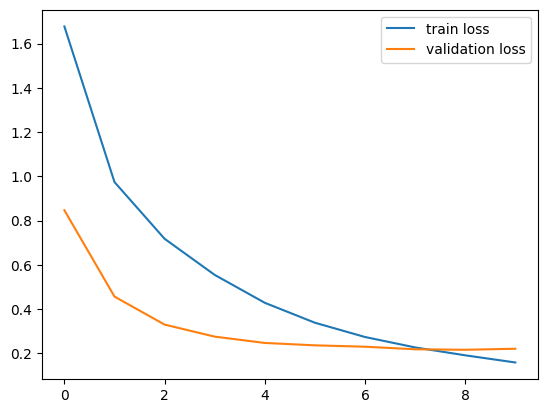

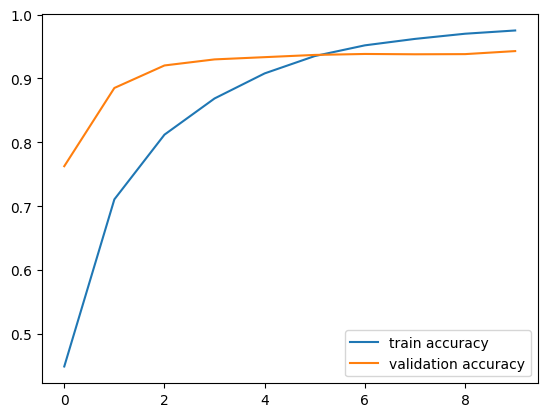

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()